In [2]:
%load_ext autoreload
%autoreload 2
%aimport

Modules to reload:
all-except-skipped

Modules to skip:



In [3]:
%matplotlib inline

In [4]:
from relaxed.plot_defaults import *

In [5]:
import astropy
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt 
import re 
from astropy.table import Table
import astropy.table
import json
from scipy import stats
from copy import deepcopy
import scipy
import warnings

import matplotlib as mpl
from sklearn.model_selection import train_test_split



In [22]:
from relaxed.analysis import setup, get_quantiles, gaussian_conditional, get_am, get_a2_from_am, get_lam, get_ma

# Data

In [23]:
indices

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144

In [24]:
# catalog
hcat, indices, scales = setup('m11', path='../../output')

# get ma 
ma = get_ma(hcat.cat, indices)

# obtain a_m
am, mass_bins = get_am('m11', min_mass=0.1, path='../../output')

# Calculate gradients

In [49]:
ma[idx, :]

array([1.        , 1.        , 0.99613403, 0.99677841, 0.99742269,
       1.00128866, 1.        , 0.99677841, 0.99871134, 0.99484537,
       0.99291244, 0.9942011 , 0.9942011 , 1.00386597, 1.00386597,
       1.00257731, 1.00451035, 1.00708766, 1.00128866, 0.99484537,
       0.9942011 , 0.99613403, 1.01353095, 1.01675264, 1.02641751,
       1.02255154, 1.02061861, 1.01932995, 1.02061861, 1.02061861,
       1.02512886, 1.0238402 , 1.02577324, 1.02641751, 1.03092786,
       1.03801553, 1.03543821, 1.03543821, 1.03994846, 1.03801553,
       1.03994846, 1.02835055, 1.01610826, 1.0180413 , 1.        ,
       1.00579901, 0.99291244, 0.98969075, 0.97744846, 0.97229383,
       0.94072169, 0.93685572, 0.89561861, 0.85953612, 0.82925259,
       0.82345363, 0.80605672, 0.80605672, 0.79768045, 0.80090209,
       0.80090209, 0.80605672, 0.80863403, 0.8079897 , 0.80734537,
       0.79832478, 0.79832478, 0.7886598 , 0.77255154, 0.75257731,
       0.7409794 , 0.72551547, 0.71327324, 0.67332478, 0.61913

In [66]:
ma[4, :]

array([1.        , 1.00139372, 0.99930308, 1.0055749 , 1.00487809,
       1.01951214, 1.02787461, 1.02578396, 1.02578396, 1.02578396,
       1.02229959, 1.02369332, 1.02020906, 1.01463417, 1.01463417,
       1.02578396, 1.01742162, 1.02229959, 1.02787461, 1.02857141,
       1.02926833, 1.02229959, 1.02648088, 1.03414631, 1.04390238,
       1.04738675, 1.04878048, 1.04878048, 1.05923347, 1.05714282,
       1.06411145, 1.06829262, 1.06202092, 1.06759582, 1.0668989 ,
       1.0668989 , 1.06202092, 1.05365857, 1.04878048, 1.06271772,
       1.05714282, 1.05783974, 1.05156793, 1.04250866, 1.03832748,
       1.01951214, 1.01533097, 1.01742162, 1.01602789, 1.01463417,
       1.01324044, 1.01811842, 1.01742162, 1.01951214, 1.02020906,
       1.01463417, 1.01602789, 0.99930308, 0.99512191, 1.01951214,
       1.01184672, 1.01184672, 1.01184672, 1.        , 1.00278745,
       1.00487809, 0.98675956, 0.96794422, 0.94006967, 0.92125433,
       0.91567943, 0.89756095, 0.88501743, 0.88432057, 0.86898

In [62]:
scales

array([1.00035, 0.99735, 0.99435, 0.99135, 0.98835, 0.98535, 0.98235,
       0.97935, 0.97635, 0.97335, 0.97035, 0.96735, 0.96435, 0.96135,
       0.95835, 0.95235, 0.94935, 0.94635, 0.94335, 0.93735, 0.93435,
       0.93135, 0.92835, 0.92535, 0.92235, 0.91935, 0.91635, 0.91335,
       0.91035, 0.90735, 0.90435, 0.90135, 0.89835, 0.89535, 0.89235,
       0.88935, 0.88635, 0.88335, 0.88035, 0.87735, 0.87435, 0.87135,
       0.86835, 0.86535, 0.86235, 0.85935, 0.85635, 0.85335, 0.85035,
       0.84735, 0.84435, 0.84135, 0.83835, 0.83535, 0.83235, 0.82935,
       0.82635, 0.82335, 0.82035, 0.81735, 0.81435, 0.81135, 0.80835,
       0.80235, 0.79635, 0.79035, 0.78435, 0.77835, 0.77235, 0.76635,
       0.76035, 0.75435, 0.74835, 0.74235, 0.73635, 0.73035, 0.72435,
       0.71835, 0.71235, 0.70635, 0.70035, 0.69435, 0.68835, 0.68235,
       0.67635, 0.67035, 0.66435, 0.65835, 0.65235, 0.64635, 0.64035,
       0.63435, 0.62835, 0.62235, 0.61635, 0.61035, 0.60435, 0.59835,
       0.59235, 0.58

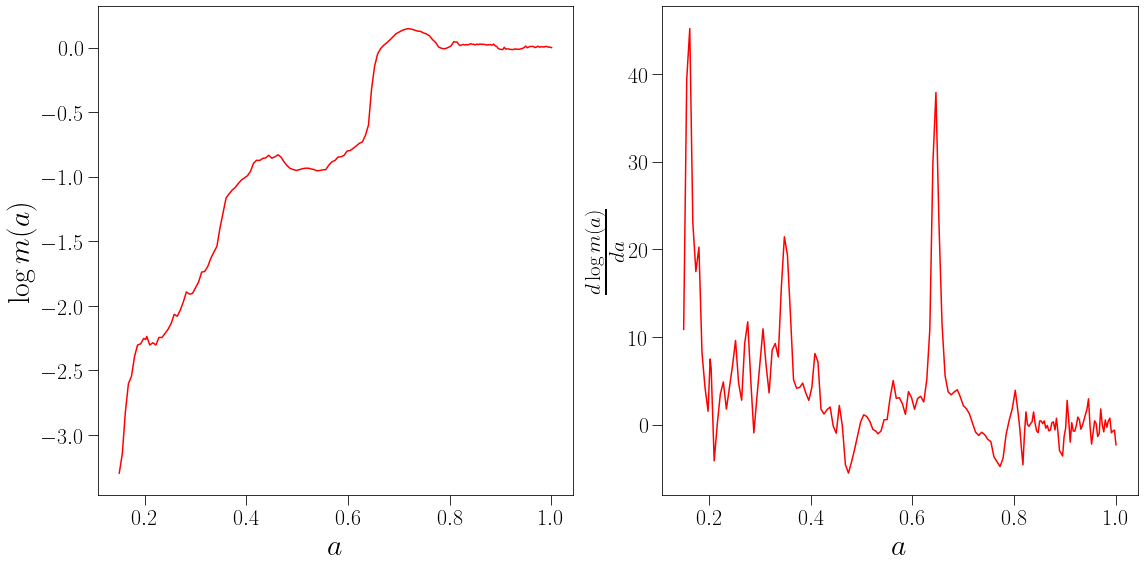

In [83]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
idx = np.random.randint(len(ma))
x = scales
grad = np.gradient(np.log(ma[idx, :]), x, edge_order=2)
ax1.plot(x, np.log(ma[idx, :]), 'r-')
ax2.plot(x, grad, 'r-')

ax1.set_xlabel(r"$a$", size=30)
ax2.set_xlabel(r"$a$", size=30)

ax1.set_ylabel(r"$\log m(a)$", size=30)
ax2.set_ylabel(r"$\frac{d\log m(a)}{da}$", size=30)
plt.tight_layout()

Text(0.5, 0, '\\rm index')

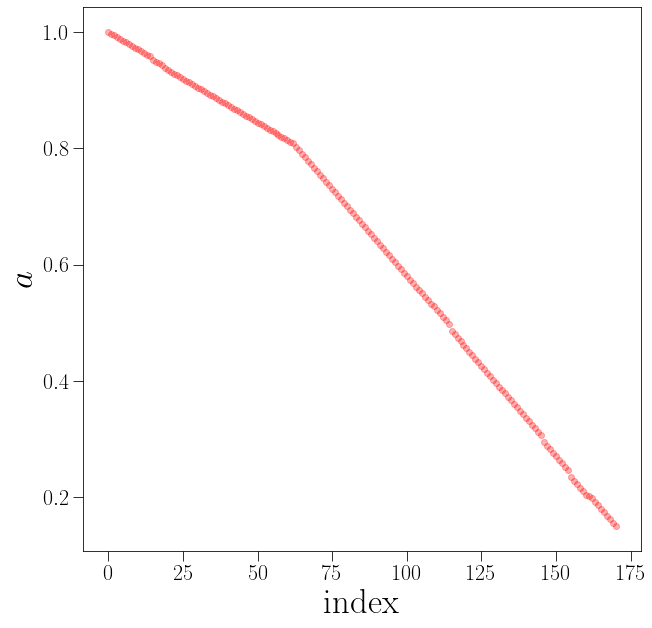

In [21]:
plt.plot(scales, 'ro', alpha=0.3)
plt.ylabel(r"$a$", size=35)
plt.xlabel(r"\rm index", size=35)

In [10]:
mass_bins.shape

(100,)

In [9]:
am.shape

(10000, 100)

In [11]:
# no smoothing
gammas = [] 
for i in range(1, len(mass_bins)):
    DeltaLogM = np.log(mass_bins[i]) - np.log(mass_bins[i-1])
    DeltaA = am[:, i] - am[:, i-1]
    gamma = DeltaLogM.reshape(1) / DeltaA.reshape(-1)
    gammas.append(gamma)
gammas = np.array(gammas).reshape(-1, 99)

(array([3.590e+03, 2.005e+03, 1.332e+03, 8.690e+02, 5.830e+02, 4.190e+02,
        2.750e+02, 2.090e+02, 1.390e+02, 9.200e+01, 7.100e+01, 7.000e+01,
        2.900e+01, 2.800e+01, 1.200e+01, 1.500e+01, 1.600e+01, 1.900e+01,
        2.300e+01, 1.000e+01, 1.600e+01, 8.000e+00, 1.300e+01, 1.200e+01,
        6.000e+00, 6.000e+00, 3.000e+00, 3.000e+00, 8.000e+00, 3.000e+00]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ,
        106.66666667, 113.33333333, 120.        , 126.66666667,
        133.33333333, 140.        , 146.66666667, 153.33333333,
        160.        , 166.66666667, 173.33333333, 180.        ,
        186.66666667, 193.33333333, 200.        ]),
 <BarContainer object of 30 artists>)

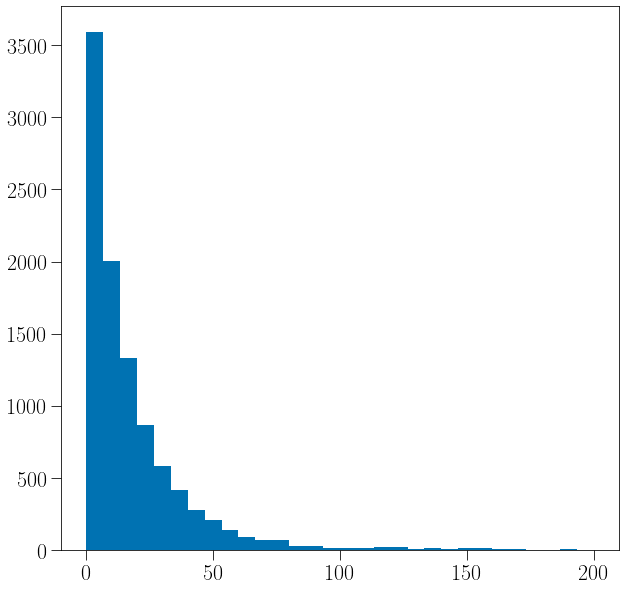

In [16]:
plt.hist(gammas[:, 50], bins=30, range=(0, 200))

In [88]:
np.gradient(np.array([[1, 2, 3], [1, 2, 3]], dtype=float), axis=1)

array([[1., 1., 1.],
       [1., 1., 1.]])